In [ ]:
# Getting data

**Install required packages**

In [2]:
!pip install -q webhoseio
!pip install -q sklearn
!pip install -q os
print("Done")

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Done


  Could not find a version that satisfies the requirement os (from versions: )
No matching distribution found for os
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


**Import required packages**

In [2]:
import re
import webhoseio
import json
import time
import numpy as np
import datetime
from os import listdir
import nltk
from nltk.stem import PorterStemmer

print("Done")
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))

Done
2018-11-03 10:40


**Define global variables**

In [340]:
articles = []
types = list()
words = list()
#NLTK´S stopwords + mine
stopWords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours","ers", "yourself", "yourselves", "he","isnt","cant" "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "wasnt", "were", "be", "been", "being", "have", "havent", "has", "had", "having", "do", "does", "doesnt", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

trainingPercentage = 80
amountOfArticlesLoad = 1000

removeUnfrequent = 1
maxUnFrequent = 1 # if set to 1 => remove all words with number of usage = 1
removeFrequent = 0
usePorterStemmer = 1
ps = PorterStemmer()

#Declare which classes include in the alogrithm
#0 - Finance
#1 - Sport
#2 - Technology
#3 - Entertainment
includeClasses = [0,1,2,3]

class Regs: 
    specialChars = '' 
    digits = '' 
    singleChars = ''
    multipleWhiteSpaces = ''
    stopWords = list()
regexes = Regs()
regexes.specialChars = re.compile('[^\w\s]')
regexes.digits = re.compile('\d')
regexes.singleChars = re.compile('\s.\s')
regexes.multipleWhiteSpaces = re.compile('[ ]{2,}')
for sw in stopWords:
    exp = '\\b' + sw + '+\W'
    regexes.stopWords.append(re.compile(exp))
    
def preprocessText(text):
    text = text.lower()
    #new lines
    text = text.replace('\n', ' ')
    text = text.replace('_', ' ')
    #special characters
    text = re.sub(regexes.specialChars, ' ', text)
    #digits
    text = re.sub(regexes.digits, '', text)
    #stopwords
    for sw in regexes.stopWords:
        text = re.sub(sw , '', text)
    #single characters (ex donald j trump => donald trump)
    text = re.sub(regexes.singleChars, ' ', text)
    #multiple white spaces
    text = re.sub(regexes.multipleWhiteSpaces, ' ', text)
    if usePorterStemmer == 1:
        splitted = text.split()
        for index, word in enumerate(splitted, start=0):
            splitted[index] = ps.stem(word)
        return splitted
    return(text.split())
print("fucntion preprocessText done")

print("Done")
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))

fucntion preprocessText done
Done
2018-11-04 19:52


In [336]:
#Get data for finance
if 0 in includeClasses:
    financeArticles = listdir("DATA/Finance")
    if len(financeArticles) > 0 :
        print("Preprocessing of " + str(amountOfArticlesLoad*trainingPercentage / 100) + " finance articles starting")
        start = time.time()
        for index, article in enumerate(financeArticles, start=0):
            if index < (amountOfArticlesLoad*trainingPercentage / 100) :
                with open("DATA/Finance/" + article, encoding="utf8") as json_data:
                    text = json.load(json_data)["text"]
                    textSplitted = preprocessText(text)
                    articles.append(textSplitted)
                    types.append("0")    

        end = time.time()
        print("Preprocessing finance data finished in ",end - start)
#Get data for sports data       
if 1 in includeClasses:
    sportArticles = listdir('DATA/Sports')
    if len(sportArticles) > 0 :
        print("Preprocessing of " + str(amountOfArticlesLoad*trainingPercentage / 100) + " sports articles starting")
        start = time.time()
        for index, article in enumerate(sportArticles, start=0):
            if index < (amountOfArticlesLoad*trainingPercentage / 100) :
                with open("DATA/Sports/" + article, encoding="utf8") as json_data:
                    text = json.load(json_data)["text"]
                    textSplitted = preprocessText(text)
                    articles.append(textSplitted)
                    types.append("1")     
        end = time.time()
        print("Preprocessing sports data finished in ",end - start)
#Get data for technology data       
if 2 in includeClasses:
    techArticles = listdir('DATA/Technology')
    if len(techArticles) > 0 :
        print("Preprocessing of " + str(amountOfArticlesLoad*trainingPercentage / 100) + " technology articles starting")
        start = time.time()
        for index, article in enumerate(techArticles, start=0):
            if index < (amountOfArticlesLoad*trainingPercentage / 100) :
                with open("DATA/Technology/" + article, encoding="utf8") as json_data:
                    text = json.load(json_data)["text"]
                    textSplitted = preprocessText(text)
                    articles.append(textSplitted)
                    types.append("2")     
        end = time.time()
        print("Preprocessing technology data finished in ",end - start)
#Get data for entertainment data       
if 3 in includeClasses:
    entertainmentArticles = listdir('DATA/Entertainment')
    if len(entertainmentArticles) > 0 :
        print("Preprocessing of " + str(amountOfArticlesLoad*trainingPercentage / 100) + " entertainment articles starting")
        start = time.time()
        for index, article in enumerate(entertainmentArticles, start=0):
            if index < (amountOfArticlesLoad*trainingPercentage / 100) :
                with open("DATA/Entertainment/" + article, encoding="utf8") as json_data:
                    text = json.load(json_data)["text"]
                    textSplitted = preprocessText(text)
                    articles.append(textSplitted)
                    types.append("3")     
        end = time.time()
        print("Preprocessing entertainment data finished in ",end - start)
        
        
start = time.time()
#create one array fromm all articles
words = [item for sublist in articles for item in sublist]
#remove duplicate values from words list
words = list(set(words))
words = sorted(words)
wordsDictionary = dict((v, i) for i, v in enumerate(words))
end = time.time()
print("Creating dictionary finished in ",end - start)
print("There are " + str(len(words)) + " words")

print("Creating matrix of containing words")
start = time.time()
articleWords = np.zeros((len(articles), len(words) + 1))
for index, article in enumerate(articles, start=0):
    articleWords[index, 0 ] = types[index] 
    for j, word in enumerate(article, start=0):
        if word != '':
            articleWords[index, wordsDictionary[word] + 1] = 1   

if removeUnfrequent == 1:    
    #Remove words with occurance = 1
    removableIndexes = []
    for word in wordsDictionary:
        if(sum(articleWords[:,wordsDictionary[word]]) > maxUnFrequent):
            removableIndexes.append(wordsDictionary[word])
    ind = np.array(removableIndexes)
    words = np.array(words)
    words = np.array(words[ind])
    articleWords = articleWords[:,np.insert(ind + 1, 0,0, axis=0)]
    
if removeFrequent > 0:
    usage = np.zeros(len(words)+1)
    for i in range(1, len(words)+1):
        usage[i] = sum(articleWords[:,i])
    for i in range(0, removeFrequent):
        words = np.delete(words,usage.tolist().index(max(usage)),0)
        articleWords = np.delete(articleWords, usage.tolist().index(max(usage)),1)
        usage = np.delete(usage,usage.tolist().index(max(usage)),0)
        
print("There are " + str(len(words)) + " words")

end = time.time()
print("Creating matrix finished in ",end - start)
    
print("Done")

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))

Preprocessing of 320.0 finance articles starting
Preprocessing finance data finished in  6.83372163772583
Preprocessing of 320.0 sports articles starting
Preprocessing sports data finished in  5.066815376281738
Preprocessing of 320.0 technology articles starting
Preprocessing technology data finished in  7.21941614151001
Preprocessing of 320.0 entertainment articles starting
Preprocessing entertainment data finished in  6.354069948196411
Creating dictionary finished in  0.062489986419677734
There are 20462 words
Creating matrix of containing words
There are 9904 words
Creating matrix finished in  3.3995652198791504
Done
2018-11-04 16:03


In [337]:
print("Starting creation of matrix")
start = time.time()
X = articleWords
#calculate the phi values
numberOfClasses = len(includeClasses)
Y = np.zeros((numberOfClasses, X.shape[1]))
#number of rows (number of samples in training set)
m = X.shape[0]

#number of words
n = X.shape[1] - 1

sumClasses = np.zeros((numberOfClasses))
#number of rows clasified to first / second group
for c, index in enumerate(includeClasses, start = 0):
    sumClasses[index] = float(len(X[X[:,0] == c,0]))
    
sumY1 = float(np.sum(X[:,0]))
sumY0 = float(m - np.sum(X[:,0]))

#Laplace => alfa = 1
alfa = 1

#calcualting Phi_{y=0} and Phi_{y=1}
for j in range(0, numberOfClasses):
    Y[j,0] = (sumClasses[j] + alfa) / float(m + numberOfClasses * alfa)
#Y[0,0] = (sumY0 + alfa) / float(m + numberOfClasses * alfa)
#Y[1,0] = (sumY1 + alfa) / float(m + numberOfClasses * alfa)

for j in range(1, X.shape[1]):
    #calcualting Phi_{j|y=0} and Phi_{j|y=1}
    for k in range(0, numberOfClasses):
        Y[k,j] = (np.sum(X[X[:,0]==includeClasses[k],j]) + alfa) / (sumClasses[k] + numberOfClasses * alfa)
    #Y[0,j] = (np.sum(X[X[:,0]==1,j]) + 1) / (sumY0 + 2)
    #Y[1,j] = (np.sum(X[X[:,0]==0,j]) + 1) / (sumY1 + 2)
      
end = time.time()
print("Creating the matrix containg the probabilities finished in ",end - start)
print("Done")

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))

Starting creation of matrix
Creating the matrix containg the probabilities finished in  0.6237795352935791
Done
2018-11-04 16:03


In [338]:
nClasses = len(includeClasses)
success = 0
if 0 in includeClasses:
    print("Startin the test on finance data")
    successFinance = 0
    start = time.time()
    for index, article in enumerate(financeArticles, start=0):
        if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index < amountOfArticlesLoad:
            with open("DATA/Finance/" + article, encoding="utf8") as json_data:
                #print(index)
                testtext = json.load(json_data)["text"]
                testarticle = preprocessText(testtext)
                testArticleWords = np.zeros((1, len(words)))
                for k, word in enumerate(testarticle, start=0):
                        if word in words:
                            testArticleWords[0, np.array(words).tolist().index(word)] = 1

                P = np.zeros(nClasses)
                for j in range(0, nClasses):
                    P[j] = np.log(Y[j,0]) + ((np.log(np.array(Y[j,1:]*testArticleWords)[testArticleWords == 1]))).sum() + ((np.log(np.array((1 - Y[j,1:])*(testArticleWords - 1)*-1)[testArticleWords == 0]))).sum()

                phiz = 1 / (sum(np.exp(P-P[0])))

                if(phiz > 0.5):
                    successFinance += 1
    end = time.time()
    success += successFinance
    print("Finance testing done in ", end - start)
    print("Number of succesfully clasified texts : ", successFinance, ", in percentage: ", successFinance / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100, "%")

if 1 in  includeClasses:
    print("Startin the test on sports data")   
    successSport = 0         
    start = time.time()    
    for index, article in enumerate(sportArticles, start=0):
        if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index < amountOfArticlesLoad:
            with open("DATA/Sports/" + article, encoding="utf8") as json_data:
                #print(index)
                testtext = json.load(json_data)["text"]
                testarticle = preprocessText(testtext)
                testArticleWords = np.zeros((1, len(words)))
                for k, word in enumerate(testarticle, start=0):
                        if word in words:
                            testArticleWords[0, np.array(words).tolist().index(word)] = 1

                P = np.zeros(nClasses)
                for j in range(0, nClasses):
                    P[j] = np.log(Y[j,0]) + ((np.log(np.array(Y[j,1:]*testArticleWords)[testArticleWords == 1]))).sum() + ((np.log(np.array((1 - Y[j,1:])*(testArticleWords - 1)*-1)[testArticleWords == 0]))).sum()

                phiz = 1 / (sum(np.exp(P-P[1])))

                if(phiz > 0.5):
                    successSport +=  1
    end = time.time()
    success += successSport
    print("Sports testing done in ", end - start)
    print("Number of succesfully clasified texts : ", successSport, ", in percentage: ", successSport / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100, "%")

if 2 in includeClasses:
    print("Startin the test on technology data")   
    successTechnology = 0         
    start = time.time()    
    for index, article in enumerate(sportArticles, start=0):
        if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index < amountOfArticlesLoad:
            with open("DATA/Technology/" + article, encoding="utf8") as json_data:
                #print(index)
                testtext = json.load(json_data)["text"]
                testarticle = preprocessText(testtext)
                testArticleWords = np.zeros((1, len(words)))
                for k, word in enumerate(testarticle, start=0):
                        if word in words:
                            testArticleWords[0, np.array(words).tolist().index(word)] = 1

                P = np.zeros(nClasses)
                for j in range(0, nClasses):
                    P[j] = np.log(Y[j,0]) + ((np.log(np.array(Y[j,1:]*testArticleWords)[testArticleWords == 1]))).sum() + ((np.log(np.array((1 - Y[j,1:])*(testArticleWords - 1)*-1)[testArticleWords == 0]))).sum()

                phiz = 1 / (sum(np.exp(P-P[2])))

                if(phiz > 0.5):
                    successTechnology +=  1
    end = time.time()
    success += successTechnology
    print("Technology testing done in ", end - start)
    print("Number of succesfully clasified texts : ", successTechnology, ", in percentage: ", successTechnology / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100, "%")

if 3 in includeClasses:
    print("Startin the test on entertainment data")   
    successEntertainment = 0         
    start = time.time()    
    for index, article in enumerate(sportArticles, start=0):
        if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index < amountOfArticlesLoad:
            with open("DATA/Entertainment/" + article, encoding="utf8") as json_data:
                #print(index)
                testtext = json.load(json_data)["text"]
                testarticle = preprocessText(testtext)
                testArticleWords = np.zeros((1, len(words)))
                for k, word in enumerate(testarticle, start=0):
                        if word in words:
                            testArticleWords[0, np.array(words).tolist().index(word)] = 1

                P = np.zeros(nClasses)
                for j in range(0, nClasses):
                    P[j] = np.log(Y[j,0]) + ((np.log(np.array(Y[j,1:]*testArticleWords)[testArticleWords == 1]))).sum() + ((np.log(np.array((1 - Y[j,1:])*(testArticleWords - 1)*-1)[testArticleWords == 0]))).sum()

                phiz = 1 / (sum(np.exp(P-P[3])))

                if(phiz > 0.5):
                    successEntertainment +=  1
    end = time.time()
    success += successEntertainment
    print("Technology testing done in ", end - start)
    print("Number of succesfully clasified texts : ", successEntertainment, ", in percentage: ", successEntertainment / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100, "%")


print("Combined success: ", success / (amountOfArticlesLoad*(100 - trainingPercentage) / 100 * nClasses) * 100, "%")

Startin the test on finance data
Finance testing done in  30.84271001815796
Number of succesfully clasified texts :  54 , in percentage:  67.5 %
Startin the test on sports data
Sports testing done in  26.525007724761963
Number of succesfully clasified texts :  70 , in percentage:  87.5 %
Startin the test on technology data
Technology testing done in  35.04915165901184
Number of succesfully clasified texts :  50 , in percentage:  62.5 %
Startin the test on entertainment data
Technology testing done in  28.157384395599365
Number of succesfully clasified texts :  38 , in percentage:  47.5 %
Combined success:  66.25 %


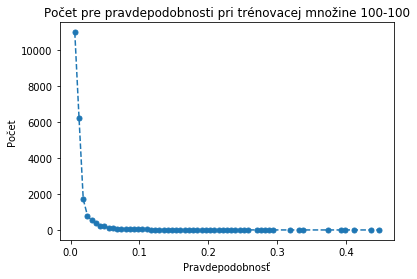

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter 

unique, counts = np.unique(Y[:,1:], return_counts=True)

plt.plot(unique, counts, '--.', markersize=10)

plt.xlabel('Pravdepodobnosť')
plt.ylabel('Počet')
plt.title('Počet pre pravdepodobnosti pri trénovacej množine 100-100')
plt.show()

#plt.savefig('myfig')


#plt.hist(Y[0,1:], bins=[0,0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.5])

#plt.show()

**SKLEARN - reproduce our algorithm**

In [310]:
print("Startin the test on finance data")
XX = articleWords[:,1:]
YY = articleWords[:,0]
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(XX, YY)
success = 0
if 0 in includeClasses:
    start = time.time()
    successFinance = 0
    for index, article in enumerate(financeArticles, start=0):
        if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index < amountOfArticlesLoad:
            with open("DATA/Finance/" + article, encoding="utf8") as json_data:
                #print(index)
                testtext = json.load(json_data)["text"]
                testarticle = preprocessText(testtext)                 
                testArticleWords = np.zeros((1, len(words)))
                for k, word in enumerate(testarticle, start=0):
                    if word != '' :
                        if word in words:
                            testArticleWords[0, words.index(word)] = 1

                prediction = clf.predict(testArticleWords)

                if(prediction == 0 ):
                    successFinance += 1

    end = time.time()
    success += successFinance
    print("Finance testing done in ", end - start)
    print("Number of succesfully clasified texts : ", successFinance, ", in percentage: ", successFinance / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100, "%")

if 1 in includeClasses:
    start = time.time()               
    successSport = 0
    for index, article in enumerate(financeArticles, start=0):
        if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index < amountOfArticlesLoad:
            with open("DATA/Sports/" + article, encoding="utf8") as json_data:
                #print(index)
                testtext = json.load(json_data)["text"]
                testarticle = preprocessText(testtext)
                testArticleWords = np.zeros((1, len(words)))
                for k, word in enumerate(testarticle, start=0):
                    if word != '' :
                        if word in words:
                            testArticleWords[0, words.index(word)] = 1

                if(clf.predict(testArticleWords) == 1):
                    successSport += 1

    end = time.time()
    success += successSport
    print("Sport testing done in ", end - start)
    print("Number of succesfully clasified texts : ", successSport, ", in percentage: ", successSport / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100, "%")

if 2 in includeClasses:
    start = time.time()                
    successTechnology = 0
    for index, article in enumerate(financeArticles, start=0):
        if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index < amountOfArticlesLoad:
            with open("DATA/Technology/" + article, encoding="utf8") as json_data:
                #print(index)
                testtext = json.load(json_data)["text"]
                testarticle = preprocessText(testtext)
                testArticleWords = np.zeros((1, len(words)))
                for k, word in enumerate(testarticle, start=0):
                    if word != '' :
                        if word in words:
                            testArticleWords[0, words.index(word)] = 1

                if(clf.predict(testArticleWords) == 2):
                    successTechnology += 1

    end = time.time()
    success += successTechnology
    print("Sport testing done in ", end - start)
    print("Number of succesfully clasified texts : ", successTechnology, ", in percentage: ", successTechnology / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100, "%")


    
if 3 in includeClasses:
    start = time.time()                
    successEntertainment = 0
    for index, article in enumerate(financeArticles, start=0):
        if index >= (amountOfArticlesLoad*trainingPercentage / 100 ) and index < amountOfArticlesLoad:
            with open("DATA/Entertainment/" + article, encoding="utf8") as json_data:
                #print(index)
                testtext = json.load(json_data)["text"]
                testarticle = preprocessText(testtext)
                testArticleWords = np.zeros((1, len(words)))
                for k, word in enumerate(testarticle, start=0):
                    if word != '' :
                        if word in words:
                            testArticleWords[0, words.index(word)] = 1

                if(clf.predict(testArticleWords) == 3):
                    successEntertainment += 1

    end = time.time()
    success += successEntertainment
    print("Sport testing done in ", end - start)
    print("Number of succesfully clasified texts : ", successEntertainment, ", in percentage: ", successEntertainment / (amountOfArticlesLoad*(100 - trainingPercentage) / 100) * 100, "%")


print("Combined success: ", success / (amountOfArticlesLoad*(100 - trainingPercentage) / 100 * nClasses) * 100, "%")

Startin the test on finance data
Finance testing done in  0.8019845485687256
Number of succesfully clasified texts :  5 , in percentage:  50.0 %
Sport testing done in  0.40010738372802734
Number of succesfully clasified texts :  10 , in percentage:  100.0 %
Sport testing done in  0.8257567882537842
Number of succesfully clasified texts :  4 , in percentage:  40.0 %
Sport testing done in  0.31331467628479004
Number of succesfully clasified texts :  3 , in percentage:  30.0 %
Combined success:  55.00000000000001 %


In [161]:
removableIndexes = []
for word in wordsDictionary:
    if(sum(articleWords[:,wordsDictionary[word]]) > 128):
        removableIndexes.append(wordsDictionary[word])

ind = np.array(removableIndexes)
print(ind)
words = np.array(words)
print(np.array(words[ind]))

[    0   446  7906 10316]
['a' 'alsohelp' 'newbie' 'sails']


In [224]:
gggg = [6, 5, 5 ,1 , 2, 3, 4]
print(gggg)
gggg = gggg[:gggg.index(max(gggg))] + gggg[gggg.index(max(gggg))+1:]
print(gggg)
gggg = gggg[:gggg.index(max(gggg))] + gggg[gggg.index(max(gggg))+1:]
print(gggg)
gggg = gggg[:gggg.index(max(gggg))] + gggg[gggg.index(max(gggg))+1:]
print(gggg)
gggg = gggg[:gggg.index(max(gggg))] + gggg[gggg.index(max(gggg))+1:]
print(gggg)
gggg = gggg[:gggg.index(max(gggg))] + gggg[gggg.index(max(gggg))+1:]
print(gggg)

[6, 5, 5, 1, 2, 3, 4]
[5, 5, 1, 2, 3, 4]
[5, 1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3]
[1, 2]


In [259]:
print(len(words))
print(articleWords.shape[1])
print(sum(articleWords[:,555]))
print(len(usage))
print(usage)

13294
13295
52.0
13295
[0. 1. 1. ... 1. 1. 1.]


In [258]:
usage = np.zeros(len(words)+1)
for i in range(1, len(words)+1):
    usage[i] = sum(articleWords[:,i])